# Customer Subscription Plan Recommendation System for Megaline Mobile Operator

## Table of Content

* [Introduction](#introduction)
* [Import Library & Dataset](#import-libary--dataset)
    * [Import Library](#import-library)
    * [Import Data](#import-data)
* [Exploratory Data Analysis](#exploratory-data-analysis)
    * [General Data Information](#general-data-information)
    * [Missing Value](#missing-value)
    * [Handle Outlier](#handle-outlier)
    * [Data Analysis](#data-analysis)
* [Machine Leaning [Predictive Model]](#machine-learning-predictive-model)
    * [Split Dataset](#split-dataset)
    * [Define Features and Target Variable](#define-features-and-target-variable)
    * [Baseline Model](#baseline-model)
        * [Train the Baseline Model](#train-the-baseline-model)
        * [Evaluate Validation Set of the Baseline Model](#evaluate-validation-set-of-the-baseline-model)
    * [Hyperparameter Tuning](#hyperparameter-tuning)
        * [Define Hyperparameter Grid](#define-hyperparameter-grid)
        * [Perform Grid Search Cross Validation](#perform-grid-search-cross-validation)
        * [Model Training with The Best Hyperparameters](#model-training-with-the-best-hyperparameters)
        * [Evaluate Validation Set of the Tuned Model](#evaluate-validation-set-of-the-tuned-model)
    * [Final Model Evaluate on Test Set](#final-model-evaluate-on-test-set)
        * [Test Set with Baseline Model](#test-set-with-baseline-model)
        * [Test Set with Tuned Model](#test-set-with-tuned-model)
* [Model Evaluation](#model-evaluation)
* [Conclusion](#conclusion)

## Introduction

Megaline, a mobile network operator, is confronted with a notable retention challenge as a considerable portion of its clientele persists with legacy subscription plans. In response, the company is embarking on the development of a predictive model with the capacity to scrutinize consumer behavior and recommend one of its latest subscription plans: Smart or Ultra.

Benefiting from access to historical customer behavior data, specifically those who have transitioned to the contemporary plans, the primary objective is to engineer a classification model adept at discerning the most fitting subscription plan for prospective customers. This initiative places paramount importance on achieving a robust level of predictive accuracy, with a specified threshold set at 0.75.

## Import Libary & Dataset

### Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import Data

In [2]:
try:
    # Try loading the file from your laptop path
    data = pd.read_csv('C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/7. Megaline Customer Behavior Analysis and Package Recommendation/users_behavior.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/7. Megaline Customer Behavior Analysis and Package Recommendation/users_behavior.csv')

In [3]:
data.sample(10)

,calls,minutes,messages,mb_used,is_ultra
1986,60.0,477.32,0.0,21214.71,0
1948,99.0,742.19,35.0,17626.73,1
2344,79.0,582.17,27.0,21133.31,0
894,19.0,110.10,0.0,6120.38,0
1864,17.0,121.61,48.0,28895.09,1
284,32.0,284.33,30.0,11559.50,0
2549,79.0,597.02,57.0,8961.87,0
3209,122.0,910.98,20.0,35124.90,1
2228,62.0,378.06,2.0,8305.09,0
189,40.0,311.79,24.0,9883.54,0


## Exploratory Data Analysis

### General Data Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


### Missing Value

In [6]:
data.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In the dataset, there is no missing value.

### Handle Outlier

In [7]:
def handle_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

handle_outliers("calls")
handle_outliers("minutes")
handle_outliers("messages")
handle_outliers("mb_used")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


The function to handle outlier is created and executed towards the column 'calls', 'minutes', 'messages', and 'mb_used'. After the function executed, there is no reduced in count of the data rows.

### Data Analysis

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to N

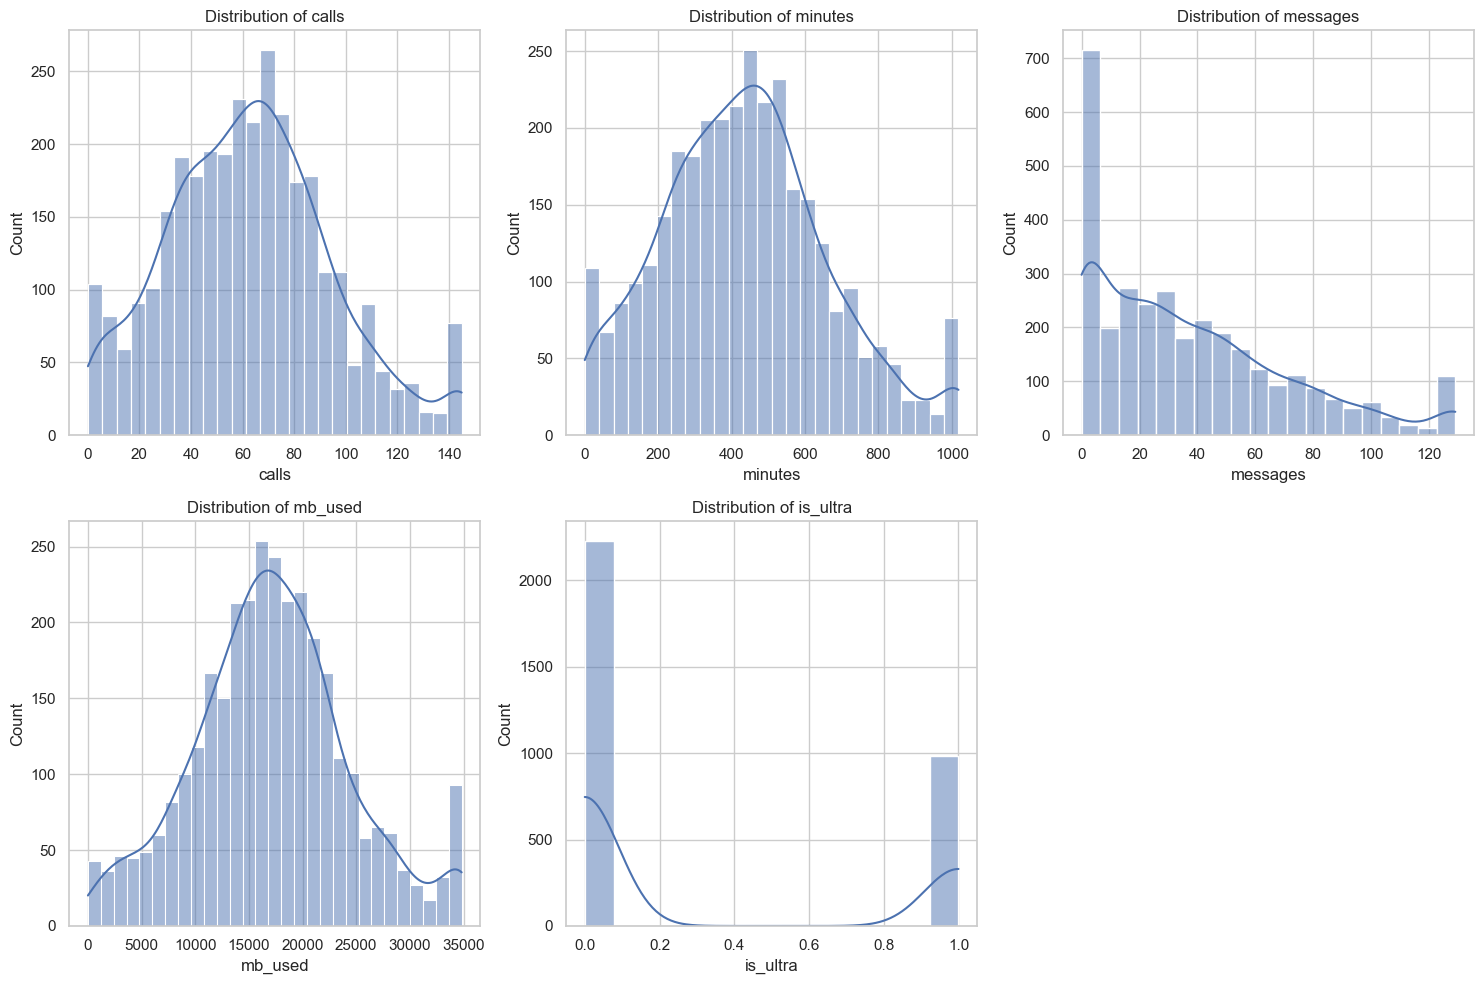

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

## Machine Learning [Predictive Model]

### Split Dataset

In [10]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

The train_test_split function is used to split the dataset into 2 subsets, a training set ('train_data') and a test set ('test_data').
20% of the dataset will be allocated to the test set and the remaining 80% will be in the training set. 

The training set is being splited into another 2 subsets, a training set ('train_data') and a validation set ('val_data'). The validation set will contain 20% from the existed training set, and the remaining 80% will be the used training set.  

### Define Features and Target Variable 

In [11]:
#train set
x_train = train_data.drop('is_ultra', axis=1)
y_train = train_data['is_ultra']

#validation set
x_val = val_data.drop('is_ultra', axis=1)
y_val = val_data['is_ultra']

#test set
x_test = test_data.drop('is_ultra', axis=1)
y_test = test_data['is_ultra']

Training Set (x_train, y_train):

x_train contains the features (columns) used to train the model. It is created by removing the column 'is_ultra' from the train_data.
y_train contains the corresponding target variable 'is_ultra', which represents the desired output for each set of features in x_train.

Validation Set (x_val, y_val):

x_val is similar to x_train but for the validation set. It includes features from val_data without the 'is_ultra' column.
y_val is the target variable corresponding to the validation set's features.

Test Set (x_test, y_test):

x_test is the set of features used to test the model's performance. It is constructed by removing the 'is_ultra' column from the test_data.
y_test is the target variable for the test set, indicating the expected output for each set of features in x_test.

### Baseline Model

Random Forest is chosen as the baseline model because it's a versatile and powerful machine learning algorithm, particularly suitable for classification tasks. In simple terms, Random Forest builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting. Think of it like making a decision by consulting multiple experts rather than relying on just one. Each tree in the forest votes on the outcome, and the final prediction is based on the majority. This ensemble approach helps in capturing various patterns in the data and makes the model more robust.

#### Train the Baseline Model

In [12]:
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

#### Evaluate Validation Set of the Baseline Model

In [13]:
y_val_pred = baseline_model.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print('Validation Accuracy:', val_accuracy)
if val_accuracy >= 0.75:
    print("Validation accuracy meets the minimum requirement.")
else:
    print("Validation accuracy is below the minimum requirement. Adjust the model or hyperparameters.")

Validation Accuracy: 0.7941747572815534
Validation accuracy meets the minimum requirement.


From the baseline model, the validation accuracy already exceed the minimum requirement of 0.75, with the value of 0.7941747572815534 however, the model accuracy can be increased by tuning the hyperparameter by using the same RandomForestClassifier as the model. 

### Hyperparameter Tuning

#### Define Hyperparameter Grid

In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tune_model = RandomForestClassifier(random_state=42)

I will be using param_grid, which is a dictionary to define a grid hyperparameter values to search during the tuning process. The tuning process will be using Grid Search. 
The hyperparameters set in this are:

- 'n_estimators': The number of trees in the forest.
- 'max_depth': The maximum depth of the tree. A higher value can make the model more complex.
- 'min_samples_split': The minimum number of samples required to split an internal node.
- 'min_samples_leaf': The minimum number of samples required to be at a leaf node.

The results show that using RandomForestClassifier with these hyperparameters gives us an accuracy score

#### Perform Grid Search Cross Validation

In [15]:
grid_search = GridSearchCV(estimator=tune_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [16]:
best_params = grid_search.best_params_

#### Model Training with The Best Hyperparameters

In [17]:
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

#### Evaluate Validation Set of the Tuned Model 

In [18]:
y_val_pred_tuned = best_model.predict(x_val)
val_accuracy_tuned = accuracy_score(y_val, y_val_pred_tuned)

print('Validation Tuned Model Accuracy:', val_accuracy_tuned)
if val_accuracy_tuned >= 0.75:
    print("Tuned model validation accuracy meets the minimum requirement.")
else:
    print("Tuned model validation accuracy is below the minimum requirement.")


Validation Tuned Model Accuracy: 0.8155339805825242
Tuned model validation accuracy meets the minimum requirement.


In [19]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


From the tuned model, the validation accuracy increased to 0.8155339805825242 from 0.7941747572815534. This is caused by the the best hyperparameter is implemented, which are:

    - max_depth : 10
    - min_samples_leaf : 1
    - min_samples_split : 10
    - n_estimators : 200

### Final Model Evaluate on Test Set

#### Test Set with Baseline Model 

In [20]:
y_test_pred = baseline_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Test Set Model Accuracy:', test_accuracy)

Test Set Model Accuracy: 0.8102643856920684


#### Test Set with Tuned Model

In [21]:
y_test_pred_tuned = best_model.predict(x_test)
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)

print('Tuned Test Model Accuracy:', test_accuracy_tuned)

Tuned Test Model Accuracy: 0.8149300155520995


From the test set, it can be seen there is a small increase value from 0.8102 to 0.8149 for the accuracy by implementing the tuned model.

## Model Evaluation

For this predictive task, I employed a Random Forest Classifier, a versatile ensemble learning algorithm known for its effectiveness in classification tasks. The baseline model was initially trained with default hyperparameters, and subsequent hyperparameter tuning was performed using Grid Search with cross-validation.

**Baseline Model:**
- Model: RandomForestClassifier
- Hyperparameters: Default settings

**Tuned Model:**
- Model: RandomForestClassifier
- Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


The hyperparameter tuning process aimed to optimize the model's performance. The grid search explored various combinations of hyperparameter values, and the best configuration was identified based on cross-validated accuracy.

There are some findings:
- The best hyperparameters for the tuned model were {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}.
- These hyperparameters were selected to enhance the model's ability to generalize patterns in the data.


After training both the baseline and tuned models, the final step involved evaluating their performance on the test set to assess real-world predictive accuracy.

**Baseline Model Test Accuracy:**
- Achieved an accuracy of 81.03%.

**Tuned Model Test Accuracy:**
- Increased the accuracy almost by 0.5% to 81.49%.


## Conclusion

The Random Forest model, especially after hyperparameter tuning, demonstrated robust performance in predicting customer preferences for subscription plans. Both the baseline and tuned models surpassed the specified accuracy threshold of 75%, affirming their reliability in making informed recommendations. The slight increase in the test set suggest that the tuned model ability to generalize well to unseeen data, enhancing its utility for Megaline in optimizing subscription plan recommendations.